# Project: TMDB movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb). The dataset includes different movie attributes such as the revenue, budget, popularity, release year, runtime and production companies. This project will analyze the dataset and deduce insights with the use of descriptive statistics.

As the Table of Contents illustrates, this project will be divided into four sections: Introduction, Data Wrangling, Exploratory Data Analysis, and Conclusions.

This project will attempt to answer the following research questions:

__1. Research Question 1__: Which attributes is the generated profit mostly correlated with? <Br>
__2. Research Question 2__: What are the top 10 movies generating the highest and lowest profit? <Br>
__3. Research Question 3__: How did the average popularity and profits of movies change from year to year? <Br>

From the above, it can outlined that a total of two independent variables (Profit and Popularity) will be analyzed against other independent variables including vote count, vote average, runtime, adjusted budget and adjusted revenue.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Read CSV file
df = pd.read_csv('tmdb-movies.csv')

In [3]:
# Display first five rows
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# Display first five rows with all columns
pd.set_option('display.max_columns', None)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# Display some descriptive statistics of dateset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
# Display the shape of the dataframe
df.shape

(10866, 21)

In [7]:
# Display info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

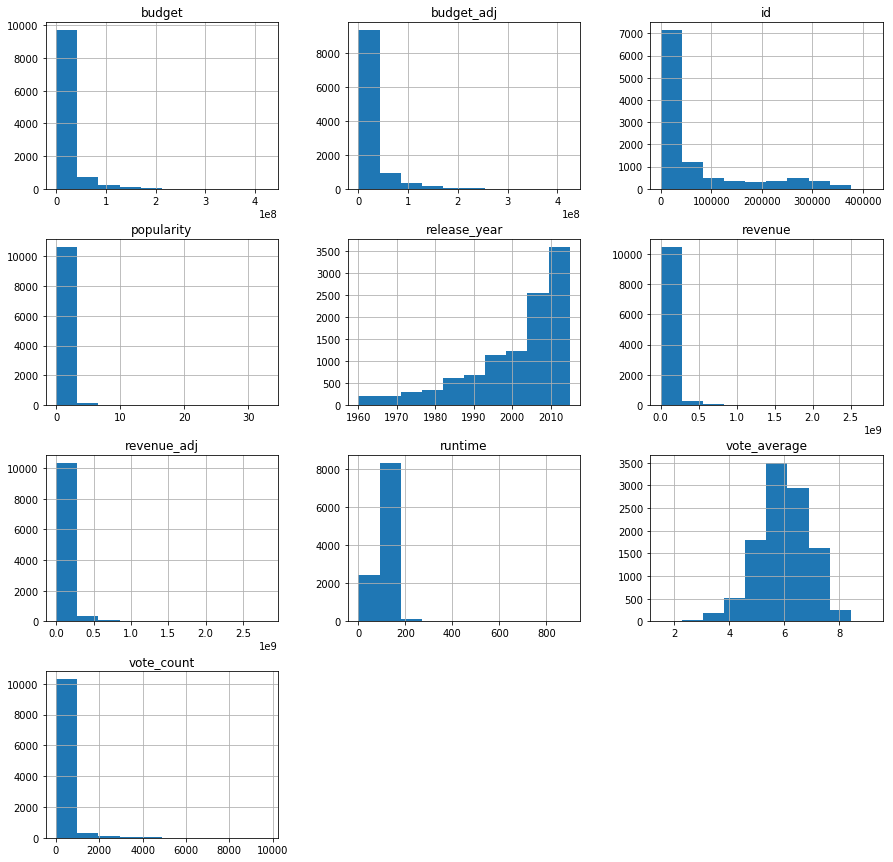

In [8]:
# Display a histogram of different column headings
df.hist(figsize=(15,15));

### Data Cleaning

From the primary assessment above, some entries were null. Such entries however, will not be dropped as they will not be used in the analysis. The section below will explore other data issues and will act to the clean the dataset.

In [9]:
# Check for duplicated Entries
df[df.duplicated(keep=False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


> Either row should be dropped

In [10]:
# Drop Duplicated Entry
df.drop([2089], axis = 0, inplace = True)

In [11]:
# Test for duplicated entries
df[df.duplicated(keep=False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


> Duplicated Entry successfully dropped

In [12]:
# Check for null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> As none of the null values above will affect the analyzed variables, none of the entries will be dropped.

In [13]:
# Drop unuseful data towards the analysis
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'revenue', 'budget'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: float64(4), int64(4), object(6)
memory usage: 1.2+ MB


> - The id column was dropped because it is redundant to keep two cells related to the id of the movie <Br>
> - The homepage, tagline, keywords, overview columns were dropped because they will not be used in the analysis <Br>
> - The revenue and budget columns were dropped as the analysis will only with revenues and budgets adjusted for inflation <Br>

In [14]:
# Replace zero values in budget_adj and revenue_adj with np.NaN
df['revenue_adj'].replace(0, np.NAN, inplace = True)
df['budget_adj'].replace(0, np.NAN, inplace = True)

In [15]:
# Drop np.NAN values in revenue_adj and budget_adj
#df = df[df['budget_adj'].notna()], inplace = True)
#df = df.dropna(subset = df['revenue_adj'], inplace = True)
df = df.dropna(subset = ['revenue_adj'])
df = df.dropna(subset = ['budget_adj'])

In [16]:
# Add a new column for profit_adj
df['profit_adj'] = df['revenue_adj'] - df['budget_adj']
profit_adj = df['profit_adj']
df.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 15 columns):
id                      3854 non-null int64
popularity              3854 non-null float64
original_title          3854 non-null object
cast                    3850 non-null object
director                3853 non-null object
runtime                 3854 non-null int64
genres                  3854 non-null object
production_companies    3808 non-null object
release_date            3854 non-null object
vote_count              3854 non-null int64
vote_average            3854 non-null float64
release_year            3854 non-null int64
budget_adj              3854 non-null float64
revenue_adj             3854 non-null float64
profit_adj              3854 non-null float64
dtypes: float64(5), int64(4), object(6)
memory usage: 481.8+ KB


> In summary, the dataset has been reduced from 10865 entries to 3853 after cleaning.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Which attributes is the generated profit mostly correlated with?

This question would help us to assess the attributes that would inform future produces on the attributes contributing most towards the generation of high profit movies.

In [18]:
# Correlation factor between Adjusted Profit and Popularity
df['profit_adj'].corr(df['popularity'])

0.51686761354486466

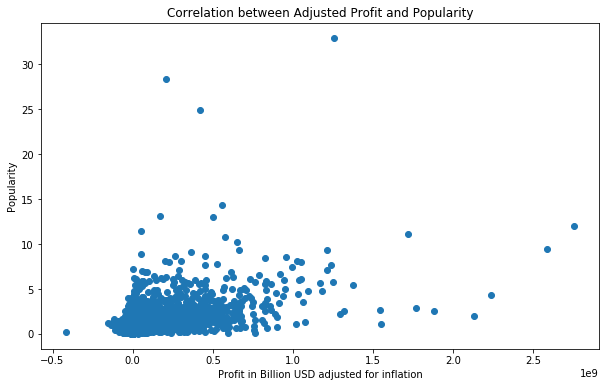

In [19]:
# Plot a scatter plot of the Popularity and Adjusted Profit
plt.figure(figsize=(10,6));
plt.scatter(df['profit_adj'], df['popularity']);
plt.title('Correlation between Adjusted Profit and Popularity');
plt.xlabel('Profit in Billion USD adjusted for inflation');
plt.ylabel('Popularity');

> This chart shows a relatively high correlation between the adjusted profits and popularity of the movie.

In [20]:
# Correlation factor between Adjusted Profit and Vote Count
df['profit_adj'].corr(df['vote_count'])

0.61406176739452645

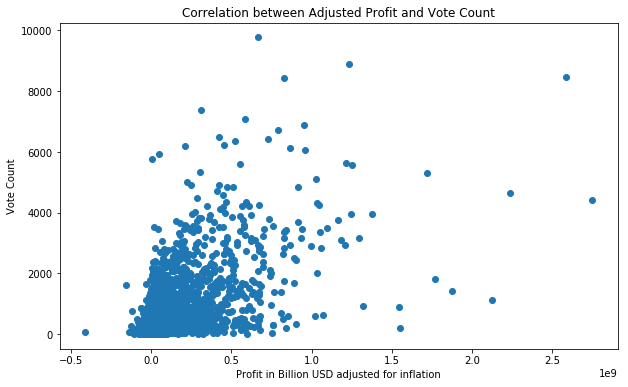

In [21]:
# Plot a scatter plot of the Vote Count and Adjusted Profit
plt.figure(figsize=(10,6));
plt.scatter(df['profit_adj'], df['vote_count']);
plt.title('Correlation between Adjusted Profit and Vote Count');
plt.xlabel('Profit in Billion USD adjusted for inflation');
plt.ylabel('Vote Count');

> This chart shows a relatively high correlation between the adjusted profits and vote count of the movie.

In [22]:
# Correlation factor between Adjusted Profit and Vote Average
df['profit_adj'].corr(df['vote_average'])

0.28865149554845476

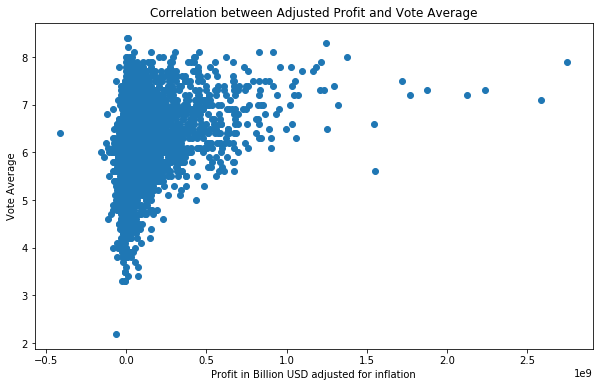

In [23]:
# Plot a scatter plot of the Vote Average and Adjusted Profit
plt.figure(figsize=(10,6));
plt.scatter(df['profit_adj'], df['vote_average']);
plt.title('Correlation between Adjusted Profit and Vote Average');
plt.xlabel('Profit in Billion USD adjusted for inflation');
plt.ylabel('Vote Average');

> This chart shows a low correlation between the adjusted profits and average vote for the movie.

In [24]:
# Correlation factor between Adjusted Profit and Runtime
df['profit_adj'].corr(df['runtime'])

0.23524866234875935

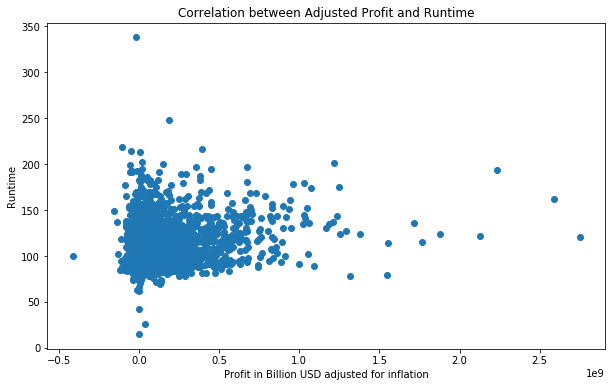

In [25]:
# Plot a scatter plot of the Popularity and Adjusted Profit
plt.figure(figsize=(10,6));
plt.scatter(df['profit_adj'], df['runtime']);
plt.title('Correlation between Adjusted Profit and Runtime');
plt.xlabel('Profit in Billion USD adjusted for inflation');
plt.ylabel('Runtime');

> This chart shows a low correlation between the adjusted profits and runtime of the movie.

In [26]:
# Correlation factor between Adjusted Profit and Adjusted Budget
df['profit_adj'].corr(df['budget_adj'])

0.4043442907401168

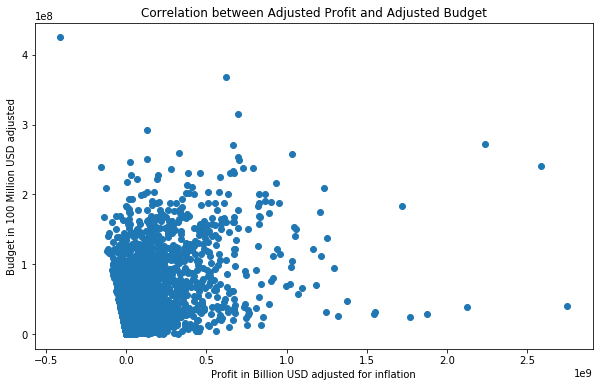

In [27]:
# Plot a scatter plot of the Adjusted Budget and Adjusted Profit
plt.figure(figsize=(10,6));
plt.scatter(df['profit_adj'], df['budget_adj']);
plt.title('Correlation between Adjusted Profit and Adjusted Budget');
plt.xlabel('Profit in Billion USD adjusted for inflation');
plt.ylabel('Budget in 100 Million USD adjusted');

> This chart shows a low correlation between the adjusted profits and production budget.

In [28]:
# Correlation factor between Adjusted Profit and Adjusted Revenue
df['profit_adj'].corr(df['revenue_adj'])

0.98185414306383467

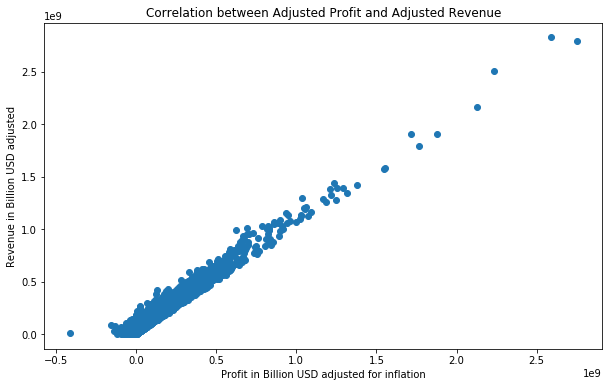

In [29]:
# Plot a scatter plot of the Adjusted Revenue and Adjusted Profit
plt.figure(figsize=(10,6));
plt.scatter(df['profit_adj'], df['revenue_adj']);
plt.title('Correlation between Adjusted Profit and Adjusted Revenue');
plt.xlabel('Profit in Billion USD adjusted for inflation');
plt.ylabel('Revenue in Billion USD adjusted');

> This chart shows a  high correlation between the adjusted profits and revenue generated.

> To sum up the above, the generated profits were mostly correlated with the adjusted revenue, vote count, and popularity, respectively. They were not correlated with the runtume, average votes and the budget. A heatmap will be added to summarize the findings in a single visualization.

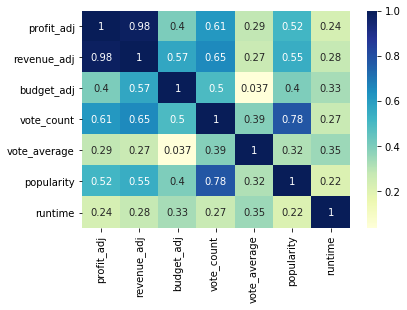

In [41]:
heatmap_data = df[['profit_adj', 'revenue_adj', 'budget_adj', 'vote_count', 'vote_average', 'popularity', 'runtime']].corr()
sns.heatmap(heatmap_data, cmap = 'YlGnBu', annot = True);

> In addition to the deductions above, the higher the popularity of the movie, the higher the vote count.

### Research Question 2  What are the top 10 movies generating the highest and lowest profit?

This question would assist in focusing on the best and worst movies. By studying those movies and their different attributes (such as genre, cast and director) and circumstances of production, this could lead to better movies produced.

In [31]:
# Top 10 movies generating the highest profit
highest_profit = df.sort_values(by='profit_adj', ascending = False).head(10)
highest_profit

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
1329,11,12.037933,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,4428,7.9,1977,3.957559e+07,2.789712e+09,2.750137e+09
1386,19995,9.432768,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09,2.586237e+09
5231,597,4.355219,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09,2.234714e+09
10594,9552,2.010733,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,122,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,12/26/73,1113,7.2,1973,3.928928e+07,2.167325e+09,2.128036e+09
9806,578,2.563191,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,124,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,6/18/75,1415,7.3,1975,2.836275e+07,1.907006e+09,1.878643e+09
8889,601,2.900556,E.T. the Extra-Terrestrial,Henry Thomas|Drew Barrymore|Robert MacNaughton...,Steven Spielberg,115,Science Fiction|Adventure|Family|Fantasy,Universal Pictures|Amblin Entertainment,4/3/82,1830,7.2,1982,2.372625e+07,1.791694e+09,1.767968e+09
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
8094,1642,1.136610,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler,114,Crime|Drama|Mystery|Thriller|Action,Columbia Pictures,7/28/95,201,5.6,1995,3.148127e+07,1.583050e+09,1.551568e+09
10110,12230,2.631987,One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,79,Adventure|Animation|Comedy|Family,Walt Disney Productions,1/25/61,913,6.6,1961,2.917944e+07,1.574815e+09,1.545635e+09
7309,1891,5.488441,The Empire Strikes Back,Mark Hamill|Harrison Ford|Carrie Fisher|Billy ...,Irvin Kershner,124,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1/1/80,3954,8.0,1980,4.762866e+07,1.424626e+09,1.376998e+09


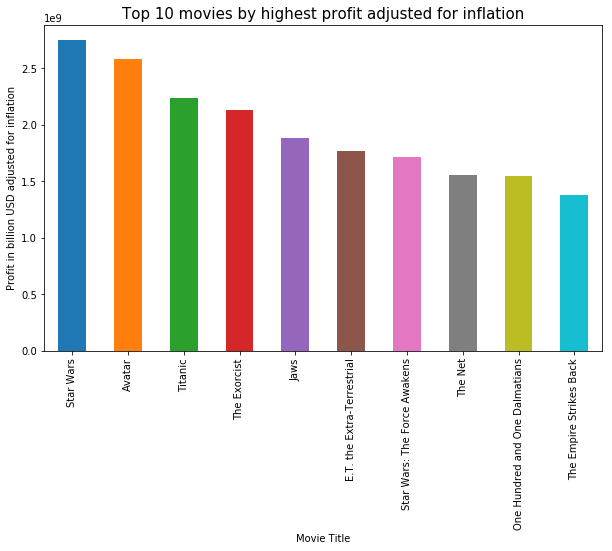

In [32]:
# Plot a bar chart of the top 10 movies generating the highest profit
highest_profit.plot(x='original_title',y='profit_adj',kind='bar', figsize=(10,6), legend = None);
plt.ylabel('Profit in billion USD adjusted for inflation', fontsize=10);
plt.xlabel('Movie Title', fontsize=10);
plt.xticks(fontsize = 10);
plt.yticks(fontsize = 10);
plt.title('Top 10 movies by highest profit adjusted for inflation', fontsize=15);

> All of the top 10 movies generated a profit in excess of 1 billion USD.

In [33]:
# 10 movies generating the lowest profit
lowest_profit = df.sort_values(by='profit_adj', ascending = True).head(10)
lowest_profit

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
2244,46528,0.250540,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,12/2/10,74,6.4,2010,4.250000e+08,1.108757e+07,-4.139124e+08
5508,57201,1.214510,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,Gore Verbinski,149,Action|Adventure|Western,Walt Disney Pictures|Jerry Bruckheimer Films|I...,7/3/13,1607,6.0,2013,2.386885e+08,8.357833e+07,-1.551102e+08
7031,10733,0.948560,The Alamo,Dennis Quaid|Billy Bob Thornton|Jason Patric|P...,John Lee Hancock,137,Western|History|War,Imagine Entertainment|Touchstone Pictures,4/7/04,60,5.9,2004,1.673946e+08,2.980774e+07,-1.375868e+08
2435,1911,1.189386,The 13th Warrior,Antonio Banderas|Vladimir Kulich|Dennis StorhÃ...,John McTiernan,102,Adventure|Fantasy|Action,Touchstone Pictures,8/27/99,275,6.2,1999,2.094485e+08,8.076712e+07,-1.286813e+08
4970,10009,1.653031,Brother Bear,Joaquin Phoenix|Jeremy Suarez|Rick Moranis|Joa...,Aaron Blaise|Robert Walker,85,Animation|Adventure|Family|Fantasy,Walt Disney Pictures|Walt Disney Feature Anima...,10/20/03,753,6.8,2003,1.185353e+08,2.963382e+02,-1.185350e+08
8102,1408,0.981049,Cutthroat Island,Geena Davis|Matthew Modine|Frank Langella|Maur...,Renny Harlin,119,Action|Adventure,Le Studio Canal+|Laurence Mark Productions|Met...,12/22/95,54,6.1,1995,1.402348e+08,2.649767e+07,-1.137371e+08
4078,11692,0.912373,The Adventures of Pluto Nash,Eddie Murphy|Randy Quaid|Rosario Dawson|Joe Pa...,Ron Underwood,95,Action|Comedy|Science Fiction,Village Roadshow Pictures|Castle Rock Entertai...,8/15/02,75,4.6,2002,1.212261e+08,8.611872e+06,-1.126143e+08
3484,50321,0.921653,Mars Needs Moms,Seth Green|Joan Cusack|Dan Fogler|Breckin Meye...,Simon Wells,88,Adventure|Animation|Family,Walt Disney Animation Studios,3/9/11,129,5.5,2011,1.454097e+08,3.779950e+07,-1.076102e+08
7332,10935,0.418950,Heaven's Gate,Kris Kristofferson|Christopher Walken|John Hur...,Michael Cimino,219,Action|Drama|History|Western,United Artists,11/19/80,18,6.0,1980,1.164256e+08,9.219668e+06,-1.072059e+08
8765,10384,0.385350,Supernova,James Spader|Angela Bassett|Robert Forster|Lou...,Walter Hill|Jack Sholder,91,Science Fiction,United Artists|Metro-Goldwyn-Mayer (MGM)|Hamme...,1/14/00,42,4.7,2000,1.139663e+08,1.877668e+07,-9.518961e+07


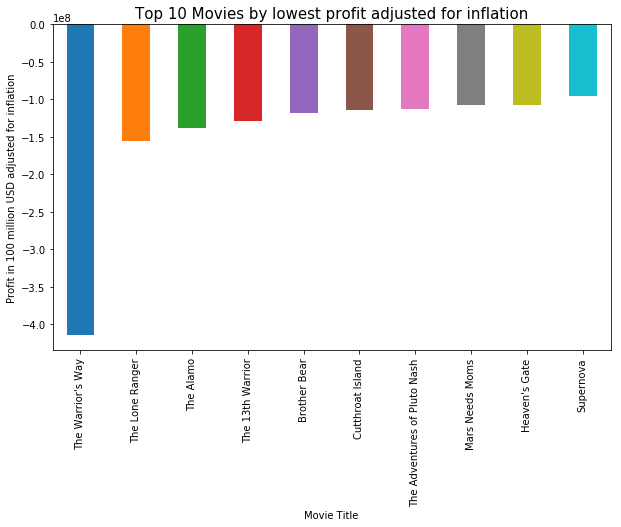

In [34]:
# Plot a bar chart of the top 10 movies generating the lowest profit
lowest_profit.plot(x='original_title',y='profit_adj',kind='bar', figsize=(10,6), legend = None);
plt.ylabel('Profit in 100 million USD adjusted for inflation', fontsize=10);
plt.xlabel('Movie Title', fontsize=10);
plt.xticks(fontsize = 10);
plt.yticks(fontsize = 10);
plt.title('Top 10 Movies by lowest profit adjusted for inflation', fontsize=15);

> The Warrior's Way was by far the movie generating the highest losses. Other movies in the same category generated losses in the approximate excess of 100 million USD.

### Research Question 3: How did the average popularity and profits of movies change from year to year?

In [35]:
# Average Popularity of Movies
avg_popularity = df.groupby('release_year').mean()['popularity']

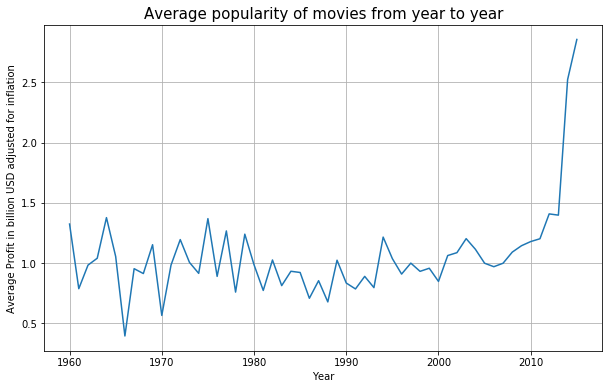

In [36]:
# Plot a line graph of average popularity of movies from year to year
avg_popularity.plot(kind='line', figsize=(10,6), legend = None);
plt.grid();
plt.xlabel('Year', fontsize=10);
plt.ylabel('Average Profit in billion USD adjusted for inflation', fontsize=10);
plt.xticks(fontsize = 10);
plt.yticks(fontsize = 10);
plt.title('Average popularity of movies from year to year', fontsize=15);

> The average popularity of movies was increasing from year to year over the period studied

In [37]:
# Average Profit of Movies
avg_profit_adj = df.groupby('release_year').mean()['profit_adj']

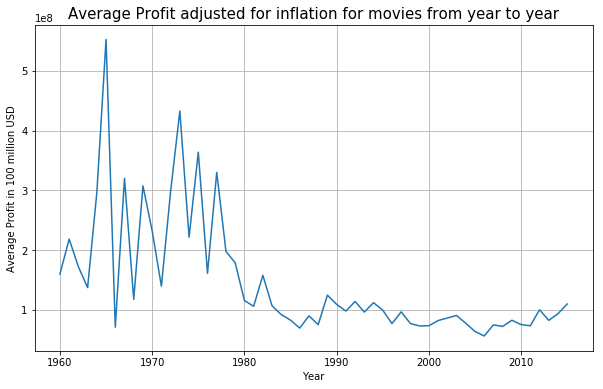

In [38]:
# Plot a line graph of average adjust profit of movies from year to year
avg_profit_adj.plot(kind='line', figsize=(10,6), legend = None);
plt.grid();
plt.xlabel('Year', fontsize=10);
plt.ylabel('Average Profit in 100 million USD', fontsize=10);
plt.xticks(fontsize = 10);
plt.yticks(fontsize = 10);
plt.title('Average Profit adjusted for inflation for movies from year to year', fontsize=15);

> The average profit reached its peak in the '60s. Starting from the '80s, there was a relatively stable values of the profits generated.

<a id='conclusions'></a>
## Conclusions

From the above investigation, the following might be induced:

1. The generated profits were a factor of the revenues generated. The budget invested in movie production however, might imply the absence of a correlation with the profits generated. The more popular a movie is and the higher its vote count could suggest the generation of higher profits. Also, the correlation factors might suggest the absence of a correlation between the average votes and runtime, and the profits generated. Furthermore, a movie with a relatively lower runtime could generate higher profits. Finally, to make blockbuster movies, significant market research is required before production to ensure that the movie would cater to a large audience in terms of its popularity.

2. Star Wars is the movie generating the most profit adjusted for inflation, while The Warrior's Way has made the most losses. The top 10 movies generated profits in excess 1.5 billion USD, while those incurring the most losses were at approximately 100 million USD or more.

3. The average popularity of movies has been increasing throughout the years. The profits generated however, has shown a steady trend from the '80s and onwards. This indicates that the production costs have been generally increasing throughout the years. More research is advised to minimize the production costs in order to enhance the revenues and profits.

## Limitations

1. This investigation was only limited to a dataset between the years 1960 and 2015. The statistical interpretation of the dataset could have been altered if both the years and after were included. <BR>
2. Multiple entries had zero values in the budget and revenue cells. Also, duplicated entries were present. Such two issues have led have to limiting the study to only 3853 out of 10865 movies.
3. The movie database did not guarantee the presence of all movies produced worldwide during the years studied. This again could affect the statistical interpretation and generalizability of the study. <BR>

Given the limitations above, the studied sample cannot be generalized over the population of movies.

In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0